# Feature Engineering With Titanic

<img src= "flow_chart.png" height=200px width=800px></img>

## 01 : Frame the Problem

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.
<br/>

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.
<br/>

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy
<br/>

For this lecture we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous dataset.

## 02 : Obtain Data

### Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms

### Loading the Dataset

In [2]:
train_data = pd.read_csv('titanic.csv')
test_data = pd.read_csv('production.csv')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 03 : Analyze Data

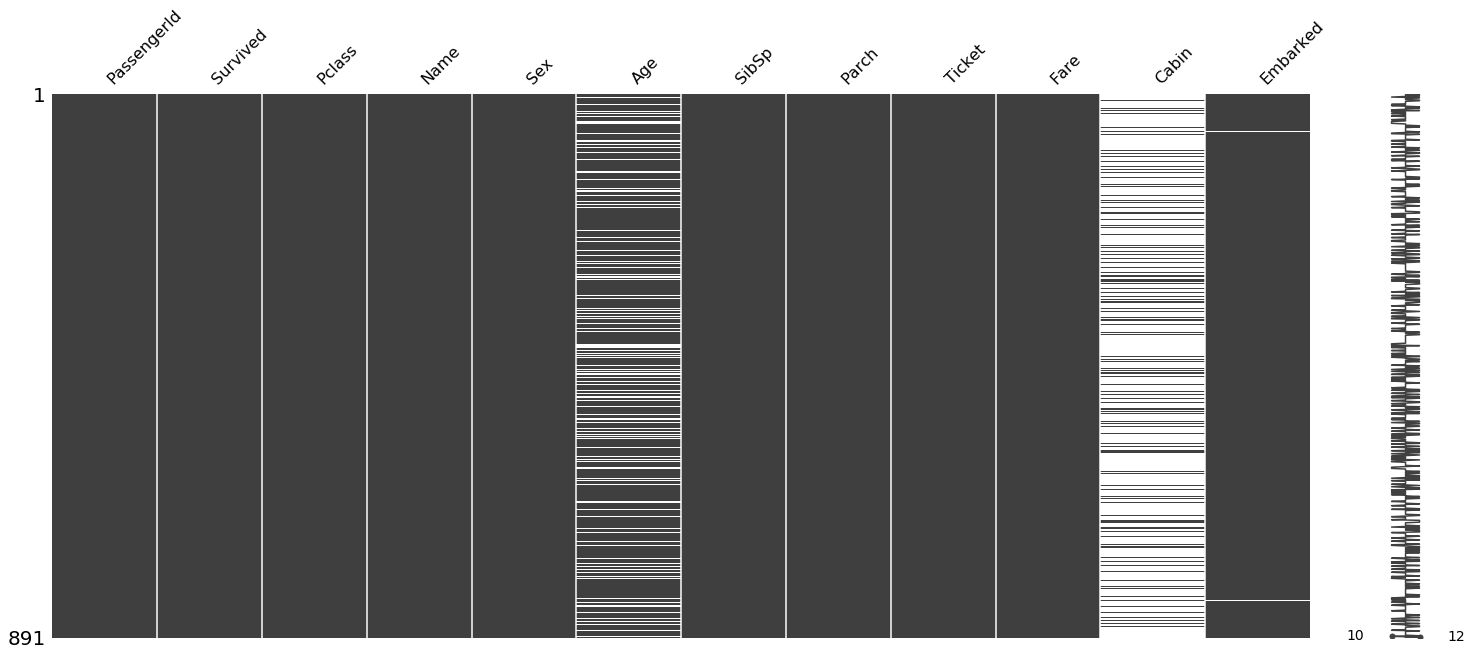

In [5]:
ms.matrix(train_data)

## 04 : Feature Engineering

We can observe that there are missing values in features Age, Cabin, Embarked.

- We have observed that there are missing values in Fare column in test data but in train data there were no missing values. To avoid such situations we can combine the data of both train and test and then split the data into two seperate files.
- We can apply feature engineering to both the datasets at the same time.
- We can get accurate inferences from the data while filling missing values

This function is used to combine the two data sets.

In [6]:
def get_combined_data():
    #removing the targets from the training data 
    global test_data
    train_data.drop('Survived',axis =  1, inplace=True)

    # merging train data and test data for feature engineering
    combined = train_data.append(test_data)
    combined.reset_index(inplace=True)
    combined.drop('index', inplace=True, axis=1)
    return combined

### Cleaning the data

In [7]:
combined_data = get_combined_data()

In [8]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [9]:
def droping_features(feature_names,data):
    data.drop(feature_names,axis=1,inplace=True)

In [10]:
droping_features('Cabin',combined_data)

Still we have missing values in Embarked, Age and Fare. As age is an important feature we can not drop it. Instead we are going to fill the missing values.

In [11]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 102.3+ KB


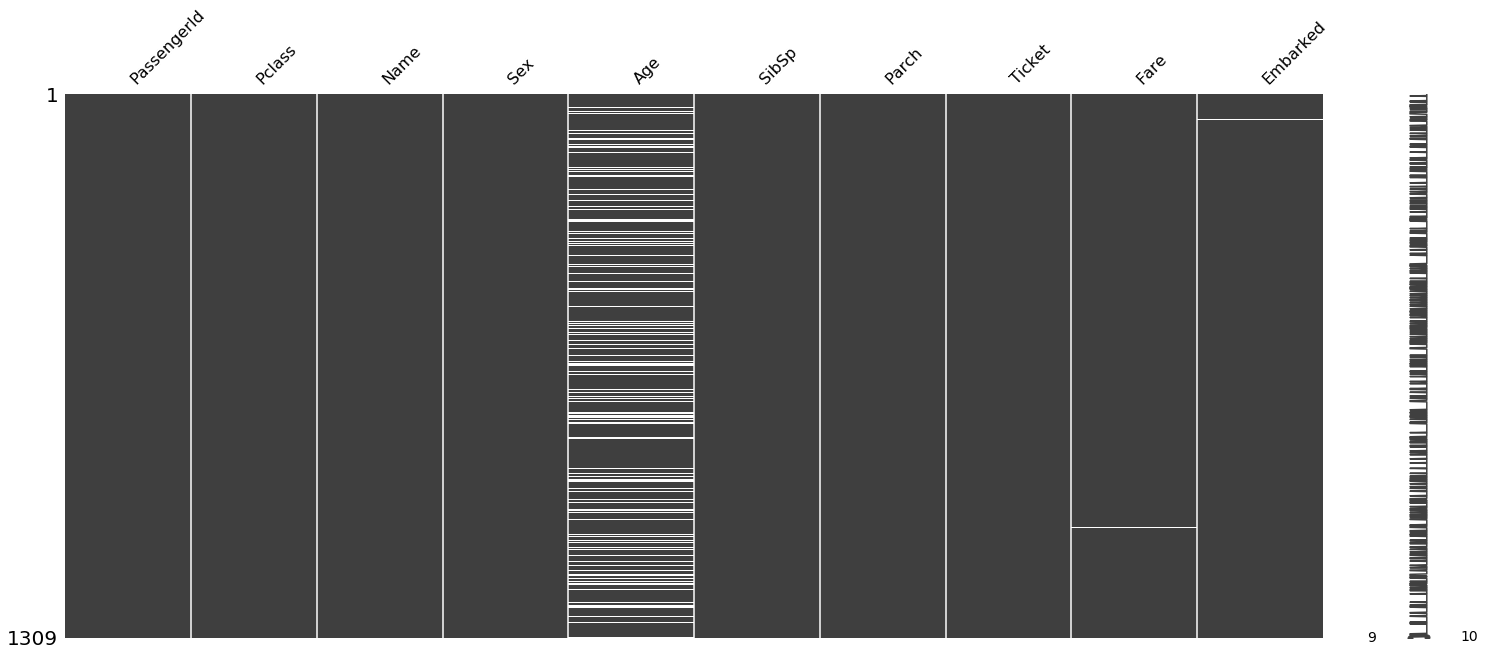

In [12]:
ms.matrix(combined_data)

In [13]:
## filling the missing values in Fare with the mean ##
combined_data["Fare"].fillna(combined_data["Fare"].mean(),inplace=True)

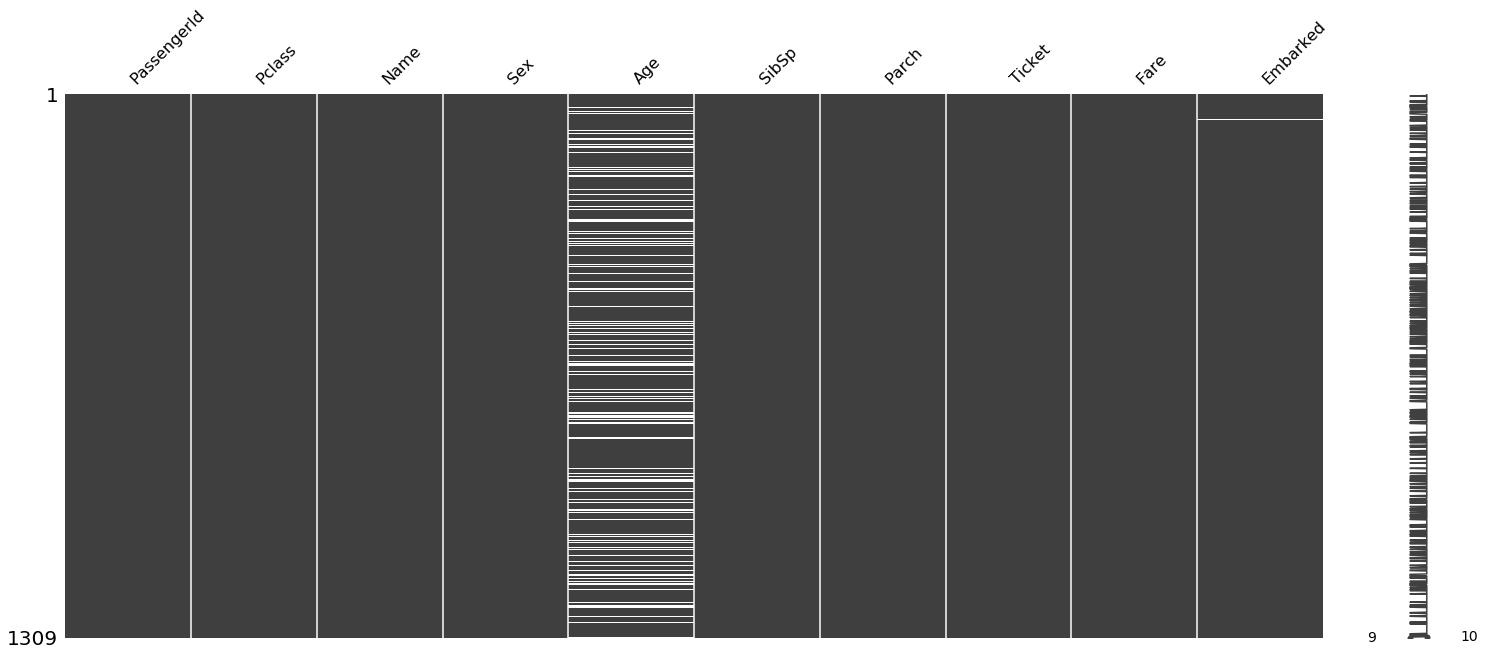

In [14]:
ms.matrix(combined_data)

In [15]:
combined_data['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [16]:
## filling the missing values in Embarked with the most frequent value i.e 'S' ##
combined_data["Embarked"].fillna('S',inplace=True)

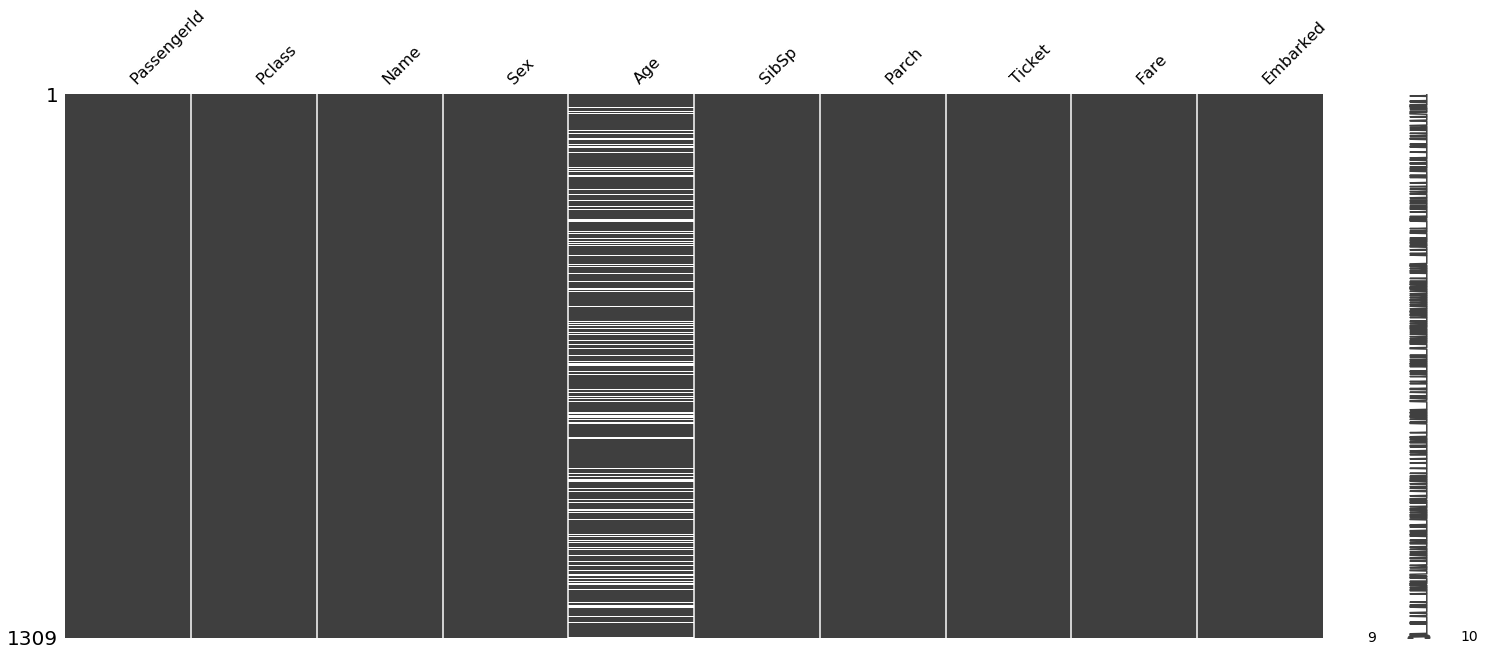

In [17]:
ms.matrix(combined_data)

In [18]:
combined_data['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [19]:
def process_title(data):
    data['Title_cat'] = data['Name'].apply(lambda x : x.split(',')[1].split('.')[0].strip())
    """
    Mr, Miss, Mrs, Master, Col, Rev, Ms, Dona, Dr  -- Titles
    """
    Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royalty",
                        "Don":        "Royalty",
                        "Sir" :       "Royalty",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "the Countess":"Royalty",
                        "Dona":       "Royalty",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royalty"

                        }
    data['Title'] = data['Title_cat'].map(Title_Dictionary)

In [20]:
process_title(combined_data)

In [21]:
combined_data[['Title','Title_cat','Name']].tail()

,Title,Title_cat,Name
1304,Mr,Mr,"Spector, Mr. Woolf"
1305,Royalty,Dona,"Oliva y Ocana, Dona. Fermina"
1306,Mr,Mr,"Saether, Mr. Simon Sivertsen"
1307,Mr,Mr,"Ware, Mr. Frederick"
1308,Master,Master,"Peter, Master. Michael J"


In [22]:
grouped_train = combined_data.head(891).groupby(['Sex','Pclass','Title'])
grouped_median_train = grouped_train.median()

In [23]:
grouped_median_train

PassengerId   Age  SibSp  Parch       Fare
Sex    Pclass Title                                              
female 1      Miss           369.0  30.0    0.0    0.0   88.25000
              Mrs            499.0  40.0    1.0    0.0   79.20000
              Officer        797.0  49.0    0.0    0.0   25.92920
              Royalty        658.5  40.5    0.5    0.0   63.05000
       2      Miss           437.5  24.0    0.0    0.0   13.00000
              Mrs            439.5  31.5    1.0    0.0   26.00000
       3      Miss           372.0  18.0    0.0    0.0    8.75625
              Mrs            405.5  31.0    1.0    1.0   15.97500
male   1      Master         446.0   4.0    1.0    2.0  120.00000
              Mr             463.0  40.0    0.0    0.0   42.40000
              Officer        648.0  51.0    0.0    0.0   35.50000
              Royalty        600.0  40.0    0.0    0.0   27.72080
       2      Master         408.0   1.0    1.0    1.0   26.00000
              Mr             440.0  31.0    0.0    0.0   13.00000
              Officer        358.5  46.5    0.0    0.0   13.00000
       3      Master         270.5   4.0    3.5    1.0   28.51250
              Mr             472.0  26.0    0.0    0.0    7.89580

In [24]:
grouped_test = combined_data.iloc[891:].groupby(['Sex','Pclass','Title'])
grouped_median_test = grouped_test.median()

In [25]:
grouped_median_test

PassengerId   Age  SibSp  Parch       Fare
Sex    Pclass Title                                              
female 1      Miss          1074.0  32.0    0.0    0.0  158.20835
              Mrs           1076.0  48.0    1.0    0.0   63.35830
              Royalty       1306.0  39.0    0.0    0.0  108.90000
       2      Miss          1121.0  19.5    1.0    1.0   24.50000
              Mrs           1123.5  29.0    0.0    0.0   26.00000
       3      Miss          1090.5  22.0    0.0    0.0    7.87920
              Mrs           1048.0  28.0    1.0    0.5   14.28125
male   1      Master        1022.0   9.5    1.0    2.0  198.43750
              Mr            1102.0  42.0    0.0    0.0   50.24790
              Officer       1094.0  53.0    1.0    0.0   81.85830
       2      Master        1033.5   5.0    0.5    1.5   27.75000
              Mr            1156.0  28.0    0.0    0.0   13.00000
              Officer       1048.5  35.5    0.5    0.5   19.50000
       3      Master        1173.0   7.0    1.0    1.0   15.24580
              Mr            1101.0  25.0    0.0    0.0    7.85420

In [26]:
def fill_ages(row, grouped_median):
        if row['Sex']=='female' and row['Pclass'] == 1:
            if row['Title'] == 'Miss':
                return grouped_median.loc['female', 1, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                return grouped_median.loc['female', 1, 'Mrs']['Age']
            elif row['Title'] == 'Officer':
                return grouped_median.loc['female', 1, 'Officer']['Age']
            elif row['Title'] == 'Royalty':
                return grouped_median.loc['female', 1, 'Royalty']['Age']

        elif row['Sex']=='female' and row['Pclass'] == 2:
            if row['Title'] == 'Miss':
                return grouped_median.loc['female', 2, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                return grouped_median.loc['female', 2, 'Mrs']['Age']

        elif row['Sex']=='female' and row['Pclass'] == 3:
            if row['Title'] == 'Miss':
                return grouped_median.loc['female', 3, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                return grouped_median.loc['female', 3, 'Mrs']['Age']

        elif row['Sex']=='male' and row['Pclass'] == 1:
            if row['Title'] == 'Master':
                return grouped_median.loc['male', 1, 'Master']['Age']
            elif row['Title'] == 'Mr':
                return grouped_median.loc['male', 1, 'Mr']['Age']
            elif row['Title'] == 'Officer':
                return grouped_median.loc['male', 1, 'Officer']['Age']
            elif row['Title'] == 'Royalty':
                return grouped_median.loc['male', 1, 'Royalty']['Age']

        elif row['Sex']=='male' and row['Pclass'] == 2:
            if row['Title'] == 'Master':
                return grouped_median.loc['male', 2, 'Master']['Age']
            elif row['Title'] == 'Mr':
                return grouped_median.loc['male', 2, 'Mr']['Age']
            elif row['Title'] == 'Officer':
                return grouped_median.loc['male', 2, 'Officer']['Age']

        elif row['Sex']=='male' and row['Pclass'] == 3:
            if row['Title'] == 'Master':
                return grouped_median.loc['male', 3, 'Master']['Age']
            elif row['Title'] == 'Mr':
                return grouped_median.loc['male', 3, 'Mr']['Age']

In [27]:
def processing_ages(data):
    data.head(891)['Age'] = data.head(891).apply(lambda row : fill_ages(row,grouped_median_train) if np.isnan(row['Age']) else row['Age']
                                                 ,axis=1)
    data.iloc[891:]['Age'] = data.iloc[891:].apply(lambda row : fill_ages(row,grouped_median_test) if np.isnan(row['Age']) else row['Age']
                                                   ,axis=1)

In [28]:
processing_ages(combined_data)

C:\Users\DELL-PC\Anaconda3\envs\mlw\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\DELL-PC\Anaconda3\envs\mlw\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [29]:
def processing_family(data):
    data['FamilySize'] = data['Parch'] + data['SibSp'] + 1
    # introducing other features based on the family size
    data['Single'] = data['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    data['SmallFamily'] = data['FamilySize'].map(lambda s: 1 if 2<=s<=4 else 0)
    data['LargeFamily'] = data['FamilySize'].map(lambda s: 1 if s>=5 else 0)

In [30]:
processing_family(combined_data)

### Categorical Conversion

In [31]:
def converting_categorical(feature,data):
    return pd.get_dummies(data[feature],drop_first=True,prefix=feature)

In [32]:
sex = converting_categorical('Sex',combined_data)
embark = converting_categorical('Embarked',combined_data)
title = converting_categorical('Title',combined_data)
title_cat = converting_categorical('Title_cat',combined_data)

droping_features(['Sex','Embarked','Name','Ticket','PassengerId','SibSp','Parch','Title','Title_cat'],combined_data)
combined_data = pd.concat([combined_data,sex,embark,title,title_cat],axis=1)

In [33]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 32 columns):
Pclass                    1309 non-null int64
Age                       1309 non-null float64
Fare                      1309 non-null float64
FamilySize                1309 non-null int64
Single                    1309 non-null int64
SmallFamily               1309 non-null int64
LargeFamily               1309 non-null int64
Sex_male                  1309 non-null uint8
Embarked_Q                1309 non-null uint8
Embarked_S                1309 non-null uint8
Title_Miss                1309 non-null uint8
Title_Mr                  1309 non-null uint8
Title_Mrs                 1309 non-null uint8
Title_Officer             1309 non-null uint8
Title_Royalty             1309 non-null uint8
Title_cat_Col             1309 non-null uint8
Title_cat_Don             1309 non-null uint8
Title_cat_Dona            1309 non-null uint8
Title_cat_Dr              1309 non-null uint8
Title_cat_Jonkh

## 05 : Model Selection

<img src="supervised_flow_chart.png"></img>

In [34]:
def recover_train_test_target_values():
    data = pd.read_csv('titanic.csv')
    targets = data.Survived
    train = combined_data.head(891)
    test = combined_data.iloc[891:]
    return train, test, targets

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
train , test , targets = recover_train_test_target_values()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(train, 
                                                    targets, test_size=0.30, 
                                                    random_state=101)

In [79]:
from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import GridSearchCV
# Build the Model.
def modelfit(alg, dtrain, predictors
log_f = LogisticRegression(class_weight='balanced',penalty='l1')
#parameters = {'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
#log_f = GridSearchCV(model, parameters,cv=5,scoring='f1')
log_f.fit(X_train,y_train)

In [71]:
#log_f.best_params_
train=pd.concat([X_train,y_train],axis=1)

In [72]:
#model = LogisticRegression(class_weight='balanced',solver='newton-cg')
#parameters = {'multi_class' : ['ovr', 'multinomial']}
#log_f = GridSearchCV(model, parameters,cv=5,scoring='f1')
#log_f.fit(X_train,y_train)


In [73]:
#log_f.best_params_

In [42]:
predictions =  log_f.predict(X_test)

In [43]:
log_f.coef_

array([[-0.78930089, -0.02434365,  0.00853428, -0.12728482,  1.88371326,
         1.77779268,  0.        , -2.49005492,  0.        , -0.23225822,
         0.        , -0.15006757,  0.77385741,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  2.5467225 ,  0.        ,  0.        ,
         0.        , -0.00316996,  0.        ,  0.        , -0.08687902,
         0.        ,  0.        ]])

In [65]:
#log_f.estimator
def get_feature_importances(alg):
    imp_list=list(x[i] for x in alg.coef_ for i in range(0,alg.coef_.size))
    col_lis = list(X_test.columns)
    feature_importances = {i[0]:i[1] for i in list(zip(col_lis,imp_list))}
    print(feature_importances)
    #sorted(feature_importances.items(),key=lambda x:x[1])
    f=[k for k in feature_importances.keys() if feature_importances[k]==0.0]
    return f

In [67]:
drop1=get_feature_importances(log_f)
drop1

{'Pclass': -0.789300885215737, 'Age': -0.024343653477446773, 'Fare': 0.008534284176906454, 'FamilySize': -0.1272848188614897, 'Single': 1.8837132555155849, 'SmallFamily': 1.7777926796551862, 'LargeFamily': 0.0, 'Sex_male': -2.4900549153536673, 'Embarked_Q': 0.0, 'Embarked_S': -0.23225821879887062, 'Title_Miss': 0.0, 'Title_Mr': -0.15006756875849434, 'Title_Mrs': 0.7738574104629434, 'Title_Officer': 0.0, 'Title_Royalty': 0.0, 'Title_cat_Col': 0.0, 'Title_cat_Don': 0.0, 'Title_cat_Dona': 0.0, 'Title_cat_Dr': 0.0, 'Title_cat_Jonkheer': 0.0, 'Title_cat_Lady': 0.0, 'Title_cat_Major': 0.0, 'Title_cat_Master': 2.5467224988205412, 'Title_cat_Miss': 0.0, 'Title_cat_Mlle': 0.0, 'Title_cat_Mme': 0.0, 'Title_cat_Mr': -0.0031699631646926337, 'Title_cat_Mrs': 0.0, 'Title_cat_Ms': 0.0, 'Title_cat_Rev': -0.08687901673098898, 'Title_cat_Sir': 0.0, 'Title_cat_the Countess': 0.0}


['LargeFamily',
 'Embarked_Q',
 'Title_Miss',
 'Title_Officer',
 'Title_Royalty',
 'Title_cat_Col',
 'Title_cat_Don',
 'Title_cat_Dona',
 'Title_cat_Dr',
 'Title_cat_Jonkheer',
 'Title_cat_Lady',
 'Title_cat_Major',
 'Title_cat_Miss',
 'Title_cat_Mlle',
 'Title_cat_Mme',
 'Title_cat_Mrs',
 'Title_cat_Ms',
 'Title_cat_Sir',
 'Title_cat_the Countess']

In [75]:
def drop_features(l):
    return [x for x in train.columns if x not in l]

In [77]:
predictors=drop_features(drop1)

In [ ]:
log_f = LogisticRegression(class_weight='balanced',penalty='l1')
#parameters = {'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
#log_f = GridSearchCV(model, parameters,cv=5,scoring='f1')
log_f.fit(X_train,y_train)

## 06 : Tune the Model

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score

In [ ]:
confusion_matrix(y_test,predictions)

In [ ]:
precision_score(y_test,predictions)

In [ ]:
recall_score(y_test,predictions)

In [ ]:
print(classification_report(y_test,predictions))





















































## 07 : Apply on Validation Data set

In [ ]:
predictions = log_f.predict(test)

In [ ]:
## saving the predictions to a csv file ##
final_result = pd.DataFrame({'PassengerId' : test_data['PassengerId'],'Survived': predictions})
final_result['PassengerId'] = final_result['PassengerId'].astype(int)
filename = 'output1.csv'
final_result.to_csv(filename,index=False)